In [2]:
# Install the googletrans package using pip
!pip install googletrans

#Import necessary libraries
import sys as sys
sys.path.insert(1, './lib/python3.7/site-packages')
import numpy as np
import pandas as pd
import googletrans
import matplotlib.pyplot as plt; plt.rcdefaults()

In [3]:
data = pd.read_csv("amazon.csv", thousands = '.', encoding='latin-1') # Specify the correct encoding for the file

In [4]:
data
data.head(10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01
5,2003,Acre,Janeiro,10,2003-01-01
6,2004,Acre,Janeiro,0,2004-01-01
7,2005,Acre,Janeiro,12,2005-01-01
8,2006,Acre,Janeiro,4,2006-01-01
9,2007,Acre,Janeiro,0,2007-01-01


In [5]:
data.tail(10)

,year,state,month,number,date
6444,2007,Tocantins,Dezembro,13,2007-01-01
6445,2008,Tocantins,Dezembro,7,2008-01-01
6446,2009,Tocantins,Dezembro,46,2009-01-01
6447,2010,Tocantins,Dezembro,72,2010-01-01
6448,2011,Tocantins,Dezembro,105,2011-01-01
6449,2012,Tocantins,Dezembro,128,2012-01-01
6450,2013,Tocantins,Dezembro,85,2013-01-01
6451,2014,Tocantins,Dezembro,223,2014-01-01
6452,2015,Tocantins,Dezembro,373,2015-01-01
6453,2016,Tocantins,Dezembro,119,2016-01-01


In [6]:
data.shape

(6454, 5)

In [7]:
data.describe(include='all')

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,1998-01-01
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,522.696312,NaN
std,5.746654,NaN,NaN,1554.846486,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,9.000000,NaN
50%,2007.000000,NaN,NaN,54.000000,NaN
75%,2012.000000,NaN,NaN,269.000000,NaN


In [8]:
data.isna().sum() #Check for any missing values

,0
year,0
state,0
month,0
number,0
date,0


In [9]:
data = data.replace(0, np.nan)
data2 = data.dropna(subset=['number'])

In [10]:
data2.describe(include= "all") #dataset is now reduced from 6454 to 5837 rows

,year,state,month,number,date
count,5837.000000,5837,5837,5837.000000,5837
unique,NaN,23,12,NaN,20
top,NaN,Rio,Outubro,NaN,2016-01-01
freq,NaN,661,534,NaN,317
mean,2007.834847,NaN,NaN,577.947918,NaN
std,5.649076,NaN,NaN,1625.176973,NaN
min,1998.000000,NaN,NaN,1.000000,NaN
25%,2003.000000,NaN,NaN,16.000000,NaN
50%,2008.000000,NaN,NaN,72.000000,NaN
75%,2013.000000,NaN,NaN,334.000000,NaN


In [11]:
forest_fire_per_month = data2.groupby('month')['number'].sum()
forest_fire_per_month

,number
month,
Abril,28364.0
Agosto,740841.0
Dezembro,152596.0
Fevereiro,30952.0
Janeiro,52587.0
Julho,217620.0
Junho,111405.0
Maio,46083.0
Março,35118.0


In [12]:
months_unique = list(data.month.unique())
forest_fire_per_month = forest_fire_per_month.reindex(months_unique, axis=0) # Converting according to the calender order
forest_fire_per_month = forest_fire_per_month.to_frame()
forest_fire_per_month.head()

,number
month,
Janeiro,52587.0
Fevereiro,30952.0
Março,35118.0
Abril,28364.0
Maio,46083.0


In [13]:
forest_fire_per_month.reset_index(level=0, inplace=True)
forest_fire_per_month.head()

,month,number
0,Janeiro,52587.0
1,Fevereiro,30952.0
2,Março,35118.0
3,Abril,28364.0
4,Maio,46083.0


In [14]:
translator = googletrans.Translator() #create an object of Translator
for month in months_unique:
    detected = translator.detect(month)
    translated = translator.translate(month)
    print(detected)
    print(translated)
    print("...")

#src — source language (default: auto)
#dest — destination language (default: en)
#origin — original text
#text — translated text
#pronunciation — pronunciation

Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=January, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=February, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=March, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=April, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=May, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=June, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=pt, confidence=None)
Translated(src=pt, dest=en, text=July, pronunciation=None, extra_data="{'confiden...")
...
Detected(lang=it, confidence=None)
Translated(src=it, dest=en, text=August, pronunciation=None, extra_data="{'

In [15]:
translator2 = googletrans.Translator() #create a new object of Translator. #cannot use the one defined before as that contains the latest #month’s calculated value
for i, m in enumerate(forest_fire_per_month['month']):
    translated = translator2.translate(m)
    month1 = translated.text
    forest_fire_per_month.at[i, 'month'] = month1



In [20]:
forest_fire_per_month

,month,number
0,January,52587.0
1,February,30952.0
2,March,35118.0
3,April,28364.0
4,May,46083.0
5,June,111405.0
6,July,217620.0
7,August,740841.0
8,September,1015925.0
9,October,629665.0


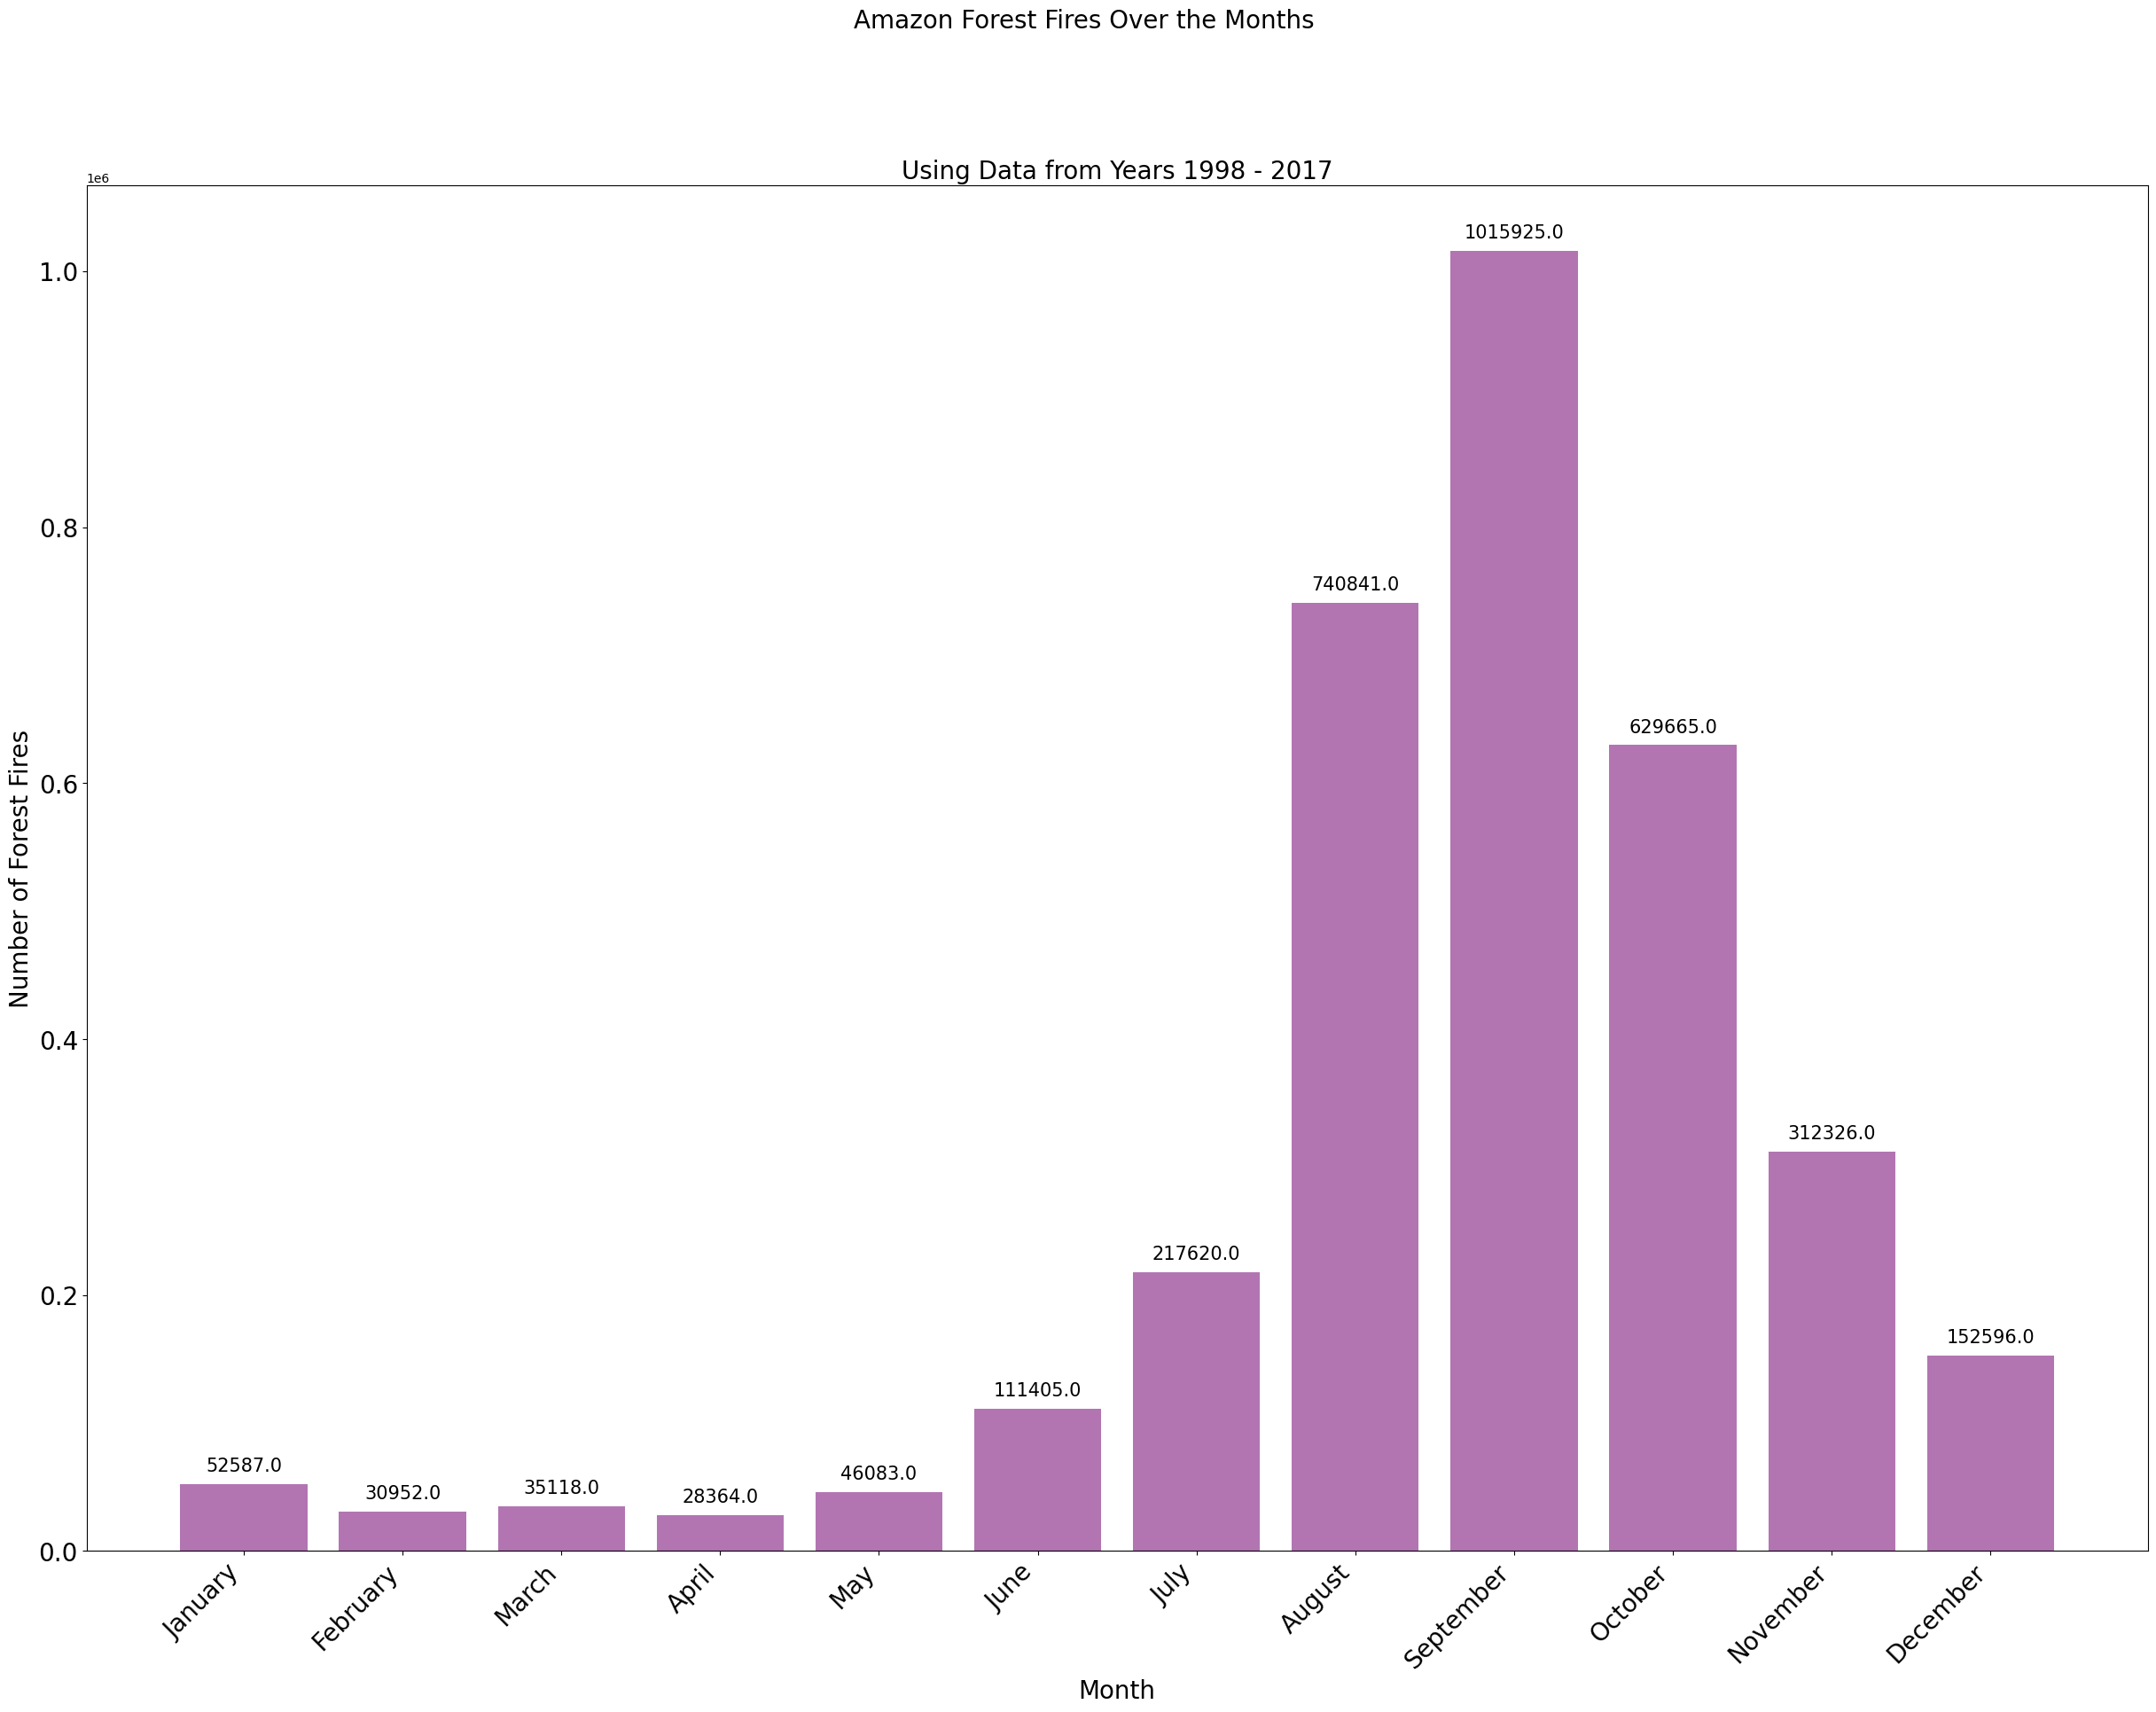

In [24]:
plt.figure(figsize=(30, 20)) #specify width and height
#plt.bar(x-values, y-values)
plt.bar(
forest_fire_per_month['month'],
forest_fire_per_month['number'],
color = (0.5,0.1,0.5,0.6))

#use .suptitle for the actual title and .title for the subheading
plt.suptitle('Amazon Forest Fires Over the Months', fontsize=20); plt.title('Using Data from Years 1998 - 2017', fontsize=20); plt.xlabel('Month', fontsize=20)
plt.ylabel('Number of Forest Fires', fontsize=20)
#plt.text(x-coordinate, y-coordinate, valueOfText, alignmnet)
#this adds text at the top of each bar indicating its value

for i, num in enumerate(forest_fire_per_month['number']):
    plt.text(
        i,
        num + 10000,
        num,
        ha='center',
        fontsize=15)

#plt.setp is to set a property on an artist object.
#plt.gca() gets the current axes (gca) instance on the current figure #matching the given keyword args.
#xticklabels and yticklabels are nothing but the values of the #lables on the x and y axis.
#The code below lets us set the fontsize and alignment of the x and #y axis tick labels

plt.setp(plt.gca().get_xticklabels(),
         rotation=45,
         horizontalalignment='right',
         fontsize=20)
plt.setp(plt.gca().get_yticklabels(), fontsize=20)
plt.show()
